In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime

In [2]:
data = pd.read_csv("~/../../mnt/c/Users/Ethan/Downloads/archive/hacker_news_sample.csv")
data

,title,url,text,dead,by,score,time,type,id,parent,descendants,ranking,deleted,timestamp
0,NaN,NaN,&gt;<i>which leads me to say why are you using...,NaN,coldtea,NaN,1.390844e+09,comment,7131680,7127578.0,NaN,NaN,NaN,2014-01-27T17:31:13Z
1,NaN,NaN,I would like to point out some counter-example...,NaN,etanol,NaN,1.319396e+09,comment,3146879,3145330.0,NaN,NaN,NaN,2011-10-23T18:46:40Z
2,NaN,NaN,NaN,NaN,NaN,NaN,1.456641e+09,comment,11190089,11189361.0,NaN,NaN,True,2016-02-28T06:26:56Z
3,NaN,NaN,<i>Our msbuild implementation can now build Pr...,NaN,Locke1689,NaN,1.407882e+09,comment,8170491,8170071.0,NaN,NaN,NaN,2014-08-12T22:13:10Z
4,NaN,NaN,No matter how awful iPhoto is it's still bette...,NaN,miloshadzic,NaN,1.362573e+09,comment,5330773,5327590.0,NaN,NaN,NaN,2013-03-06T12:28:02Z
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3659692,NaN,NaN,"They are still on book #79 ""Mystery of the Sac...",NaN,mynameishere,NaN,1.189823e+09,comment,54809,54631.0,NaN,NaN,NaN,2007-09-15T02:31:03Z
3659693,NaN,NaN,I&#x27;d argue rather it&#x27;s copyright law ...,NaN,ajarmst,NaN,1.434245e+09,comment,9713452,9711891.0,NaN,NaN,NaN,2015-06-14T01:23:00Z
3659694,NaN,NaN,that&#x27;s my startup! boom,True,woah,NaN,1.378690e+09,comment,6351340,6351046.0,NaN,NaN,NaN,2013-09-09T01:23:08Z
3659695,NaN,NaN,For one there&#x27;s less worry that you&#x27;...,NaN,aqme28,NaN,1.425258e+09,comment,9129747,9129736.0,NaN,NaN,NaN,2015-03-02T01:07:19Z


In [13]:
d2 = data.copy()
num_story = d2.loc[d2.type == "story", "type"].count()
num_comment = d2.loc[d2.type == "comment", "type"].count()
print(num_story, num_comment)

653757 3000341


In [4]:
d3 = d2.loc[d2.type == "story"]
score_freq = d3.groupby(["score"], sort = True)["score"].count().reset_index(name='frequency')

/tmp/ipykernel_985/3223394518.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d4.frequency = np.log(d4.frequency)


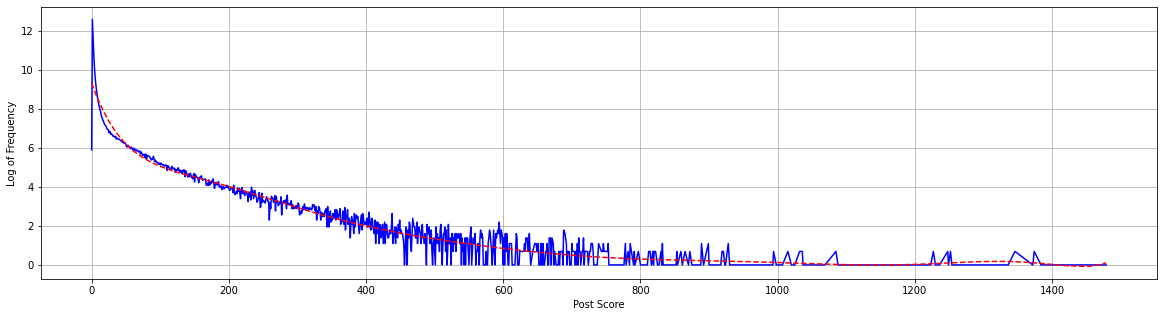

In [5]:
# plot direct distribution of scores

d4 = score_freq.loc[score_freq.score < 1500]
d4.frequency = np.log(d4.frequency)
x_axis = d4.score
y_axis = d4.frequency
plt.figure(figsize = (20, 5))
plt.plot(x_axis, y_axis, "b")
plt.grid()
z = np.polyfit(x_axis, y_axis, 10)
p = np.poly1d(z)
plt.plot(x_axis,p(x_axis),"r--")
plt.xlabel("Post Score")
plt.ylabel("Log of Frequency")
plt.show()

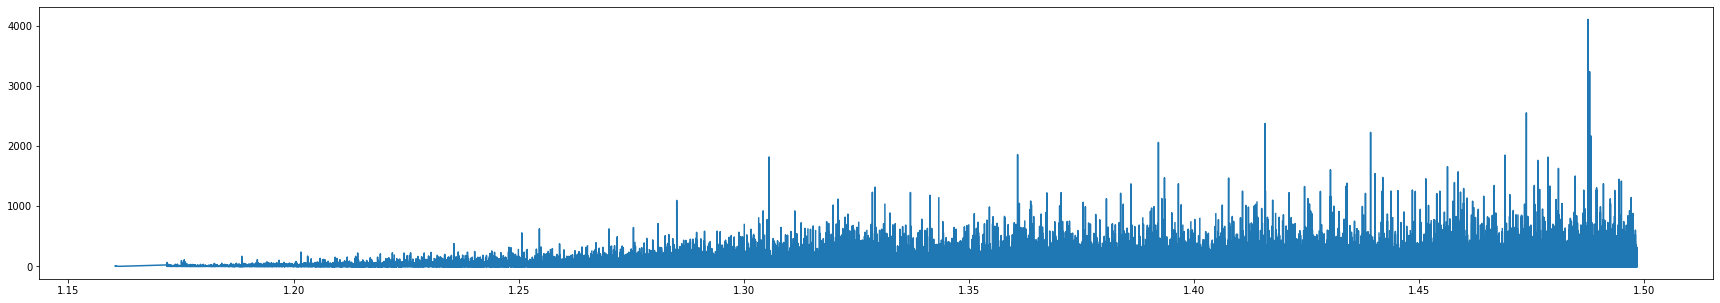

In [6]:
# group score over time

d5 = d2.loc[d2.type == "story"]
score_over_time = d5.groupby(["time"])["score"].mean().reset_index(name='average_score')
score_over_time["time"] = score_over_time["time"] / np.power(10,9)
plt.figure(figsize = (30, 5))
plt.plot(score_over_time["time"], score_over_time["average_score"])
plt.show()

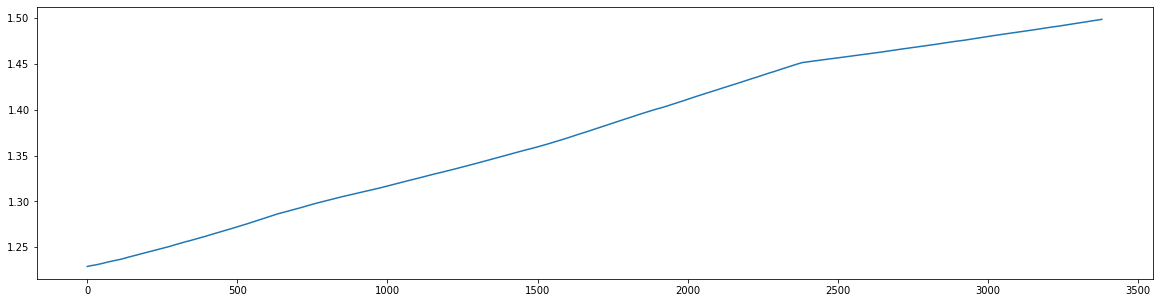

In [7]:
score_over_time
group_size = 0.0001
bottom = score_over_time["time"].min()
group_score = 0
group_count = 0
groups = []
i = bottom
while i <= score_over_time["time"].max():
    group_score = 0
    group_count = 0
    for time in score_over_time["time"]:
        if time < i:
            continue
        elif time > i + 0.1:
            break
        else:
            group_score += time
            group_count += 1
    groups.append(group_score / group_count)
    i += group_size

plt.figure(figsize = (20, 5))
plt.plot(np.arange(len(groups)), groups)
plt.show()

In [66]:
times = d2["time"].copy()

for i in range(0, len(times)):
    if times[i] > 0:
        times[i] = datetime.datetime.fromtimestamp(times[i])
data_with_dates = d2.copy()
data_with_dates["time"] = times
data_with_dates

KeyboardInterrupt: 

In [76]:
grouped_by_dates = data_with_dates[["time", "score"]]
resampled_dates_on_day = grouped_by_dates.resample('D', on ="time")
avg_score_per_day = resampled_dates_on_day.mean()
total_score_per_day = resampled_dates_on_day.sum()
print(avg_score_per_day)
print(total_score_per_day)

                score
time                 
2006-10-09   7.333333
2006-10-10   1.000000
2006-10-11   4.250000
2006-10-12   4.000000
2006-10-13        NaN
...               ...
2017-06-22  11.345238
2017-06-23   9.355805
2017-06-24  11.153374
2017-06-25  11.181818
2017-06-26   7.863636

[3914 rows x 1 columns]
             score
time              
2006-10-09    22.0
2006-10-10     1.0
2006-10-11    17.0
2006-10-12     4.0
2006-10-13     0.0
...            ...
2017-06-22  3812.0
2017-06-23  2498.0
2017-06-24  1818.0
2017-06-25  1476.0
2017-06-26   519.0

[3914 rows x 1 columns]


In [77]:
print(avg_score_per_day["score"].keys())
print(avg_score_per_day["score"].values)
print(len(avg_score_per_day["score"].values))

DatetimeIndex(['2006-10-09', '2006-10-10', '2006-10-11', '2006-10-12',
               '2006-10-13', '2006-10-14', '2006-10-15', '2006-10-16',
               '2006-10-17', '2006-10-18',
               ...
               '2017-06-17', '2017-06-18', '2017-06-19', '2017-06-20',
               '2017-06-21', '2017-06-22', '2017-06-23', '2017-06-24',
               '2017-06-25', '2017-06-26'],
              dtype='datetime64[ns]', name='time', length=3914, freq=None)
[ 7.33333333  1.          4.25       ... 11.15337423 11.18181818
  7.86363636]
3914


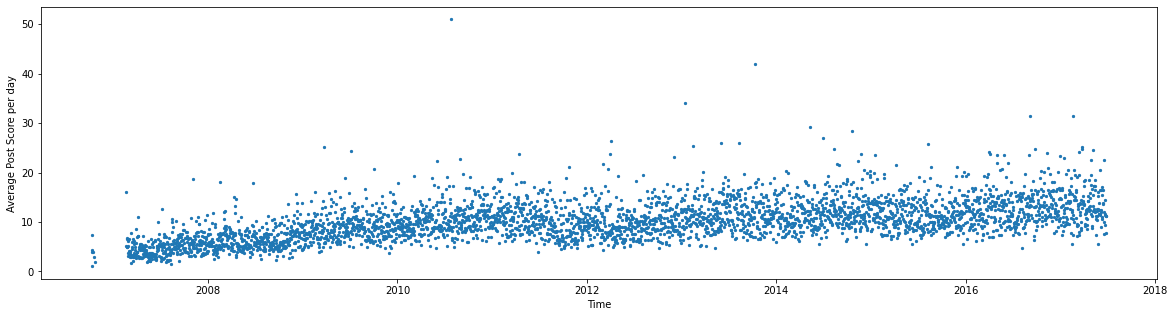

/home/zaidek/.local/lib/python3.8/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


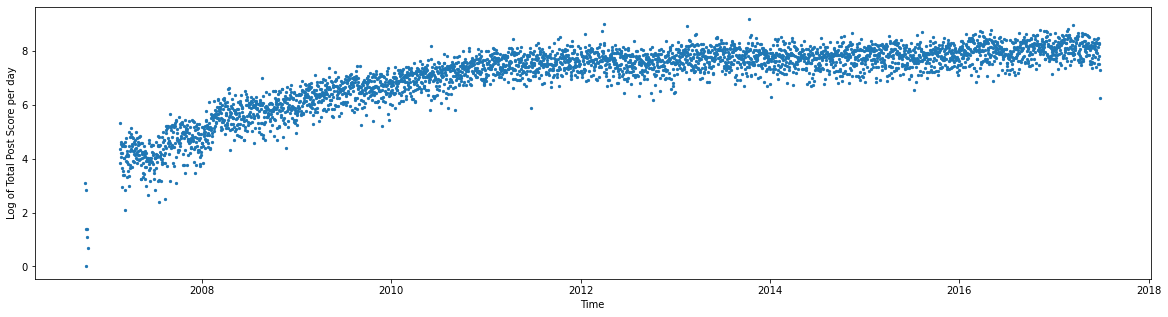

In [78]:
avg_score_per_day = avg_score_per_day.dropna()
total_score_per_day = total_score_per_day.dropna()

plt.figure(figsize = (20, 5))
plt.scatter(avg_score_per_day["score"].keys(), avg_score_per_day["score"], s = 5)
plt.xlabel("Time")
plt.ylabel("Average Post Score per day")
plt.show()

plt.figure(figsize = (20, 5))
plt.scatter(total_score_per_day["score"].keys(), np.log(total_score_per_day["score"]), s = 5)
plt.xlabel("Time")
plt.ylabel("Log of Total Post Score per day")
plt.show()

In [81]:
resampled_dates_on_month = grouped_by_dates.resample('M', on ="time")
resampled_dates_on_year = grouped_by_dates.resample('Y', on ="time")
avg_score_per_month = resampled_dates_on_month.mean()
total_score_per_month = resampled_dates_on_month.sum()
avg_score_per_year = resampled_dates_on_year.mean()
total_score_per_year = resampled_dates_on_year.sum()

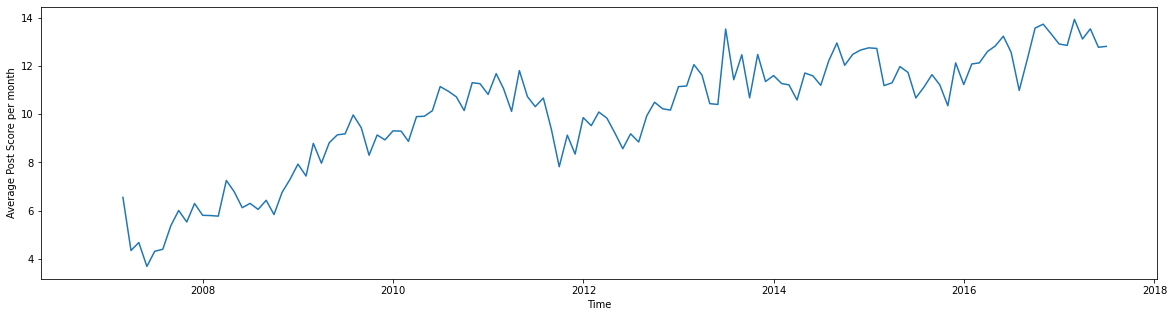

/home/zaidek/.local/lib/python3.8/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


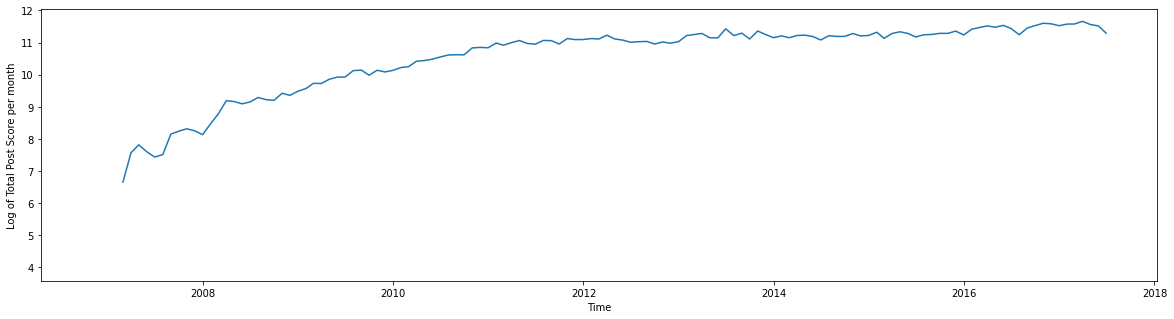

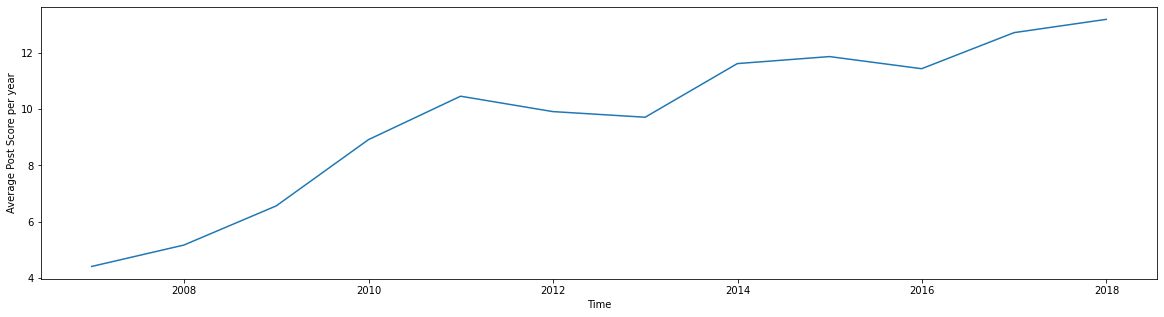

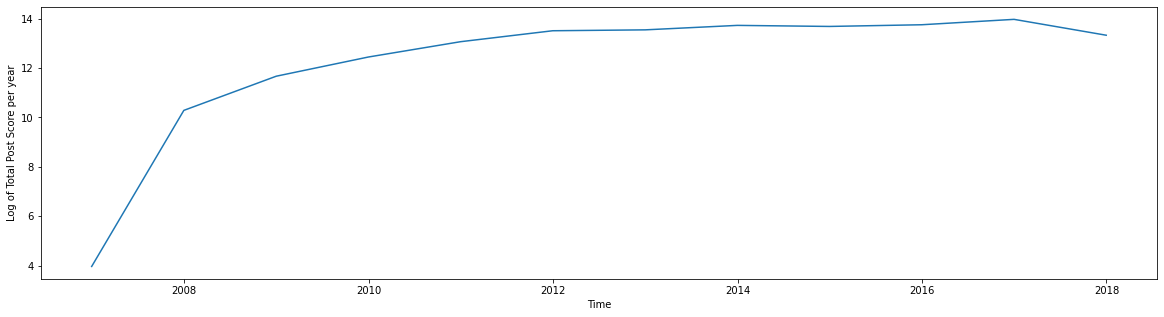

In [82]:
plt.figure(figsize = (20, 5))
plt.plot(avg_score_per_month["score"].keys(), avg_score_per_month["score"])
plt.xlabel("Time")
plt.ylabel("Average Post Score per month")
plt.show()

plt.figure(figsize = (20, 5))
plt.plot(total_score_per_month["score"].keys(), np.log(total_score_per_month["score"]))
plt.xlabel("Time")
plt.ylabel("Log of Total Post Score per month")
plt.show()

plt.figure(figsize = (20, 5))
plt.plot(avg_score_per_year["score"].keys(), avg_score_per_year["score"])
plt.xlabel("Time")
plt.ylabel("Average Post Score per year")
plt.show()

plt.figure(figsize = (20, 5))
plt.plot(total_score_per_year["score"].keys(), np.log(total_score_per_year["score"]))
plt.xlabel("Time")
plt.ylabel("Log of Total Post Score per year")
plt.show()